In [8]:
MDWV_path = "MultiDirectionalVelocities.bin"
WF_S_path = "WF_S.bin"
probes_path = "U"


In [9]:
import numpy as np
from vector import Vector
import pandas as pd
from pathlib import Path
import struct
from numpy import linalg as LA
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams["figure.figsize"] = 8, 8
# rcParams["figure.dpi"] = 130


In [10]:
def get_WF_S(path):
    data = Path(path).read_bytes()
    points, wind_dirs = struct.unpack("ii", data[:8])
    arr = np.zeros((wind_dirs, points))

    skip = 8
    for p in range(points):
        for dir in range(wind_dirs):
            val = struct.unpack("f", data[skip : skip + 4])[0]
            arr[dir, p] = val
            skip += 4

    return points, wind_dirs, arr


points, wind_dirs, arr = get_WF_S(WF_S_path)  # Assuming WF_S_path is a string

gh = np.array([0.64, 0.64, 0.66, 0.65, 0.65, 0.65, 0.67, 0.67, 0.67, 0.68])

# Use np.allclose for floating point comparison
assert np.allclose(gh, np.round(arr[0, :10], 2)), "Values are not approximately equal."


In [11]:
def get_probing_points(point_path):

    with open(point_path) as f:
        lines = f.readlines()
    ps = [p.split(" ")[3:6] for p in lines[:-2]]
    all_points = []
    for p in ps:
        all_points.append([float(c.strip("(").replace(")", "").strip()) for c in p])

    return all_points


ps = get_probing_points(probes_path)
print(len(ps))
X = [vec[0] for vec in ps]
Y = [vec[1] for vec in ps]
print(len(X), len(Y))


981
981 981


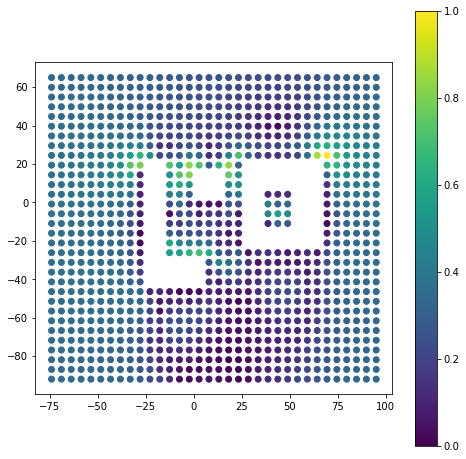

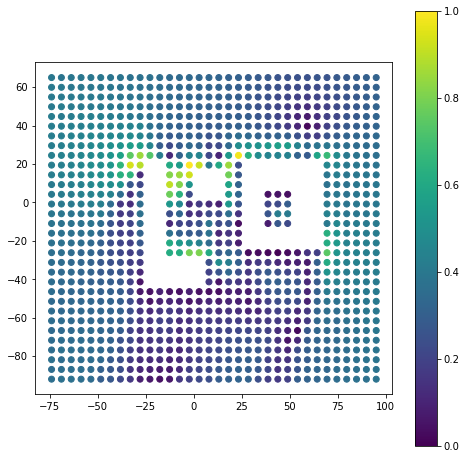

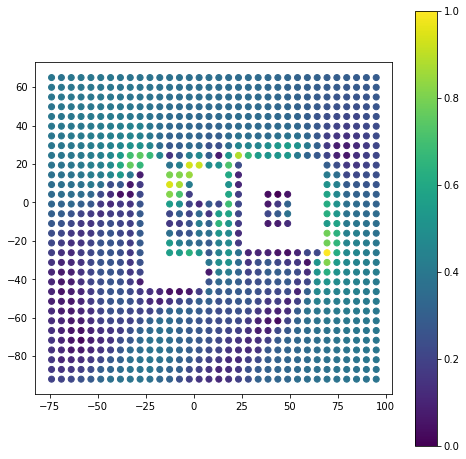

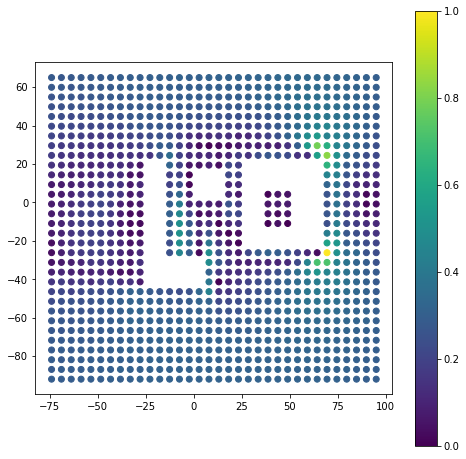

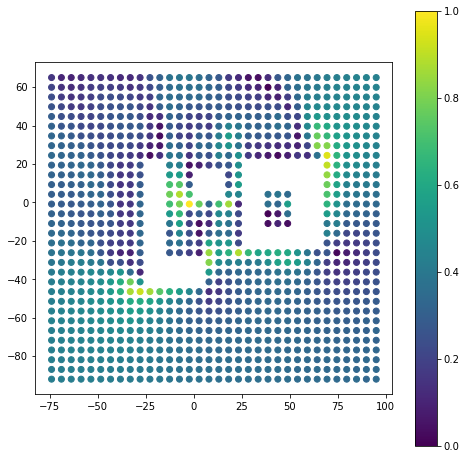

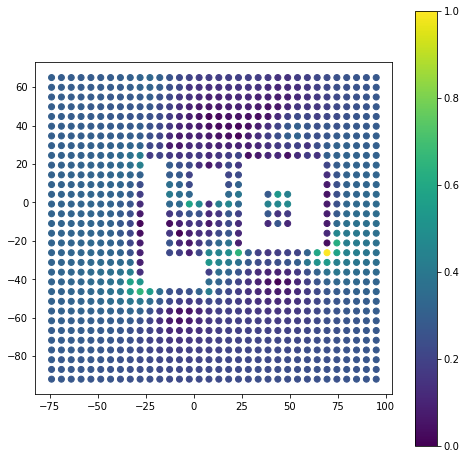

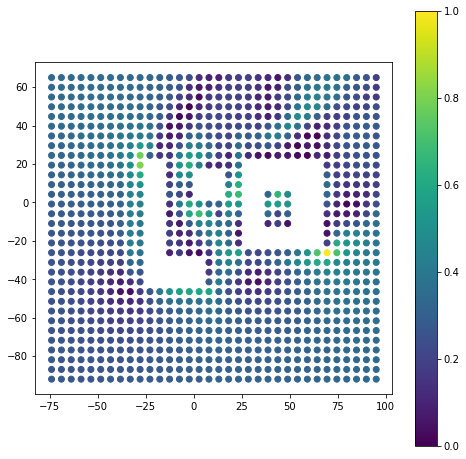

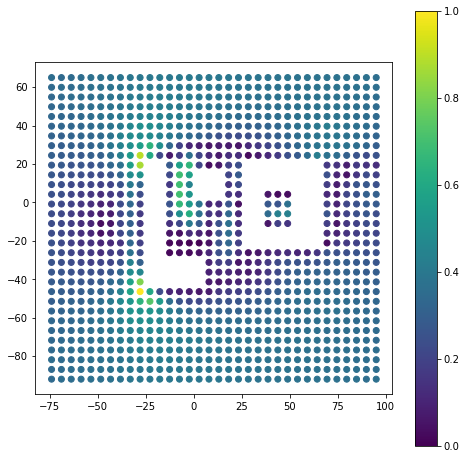

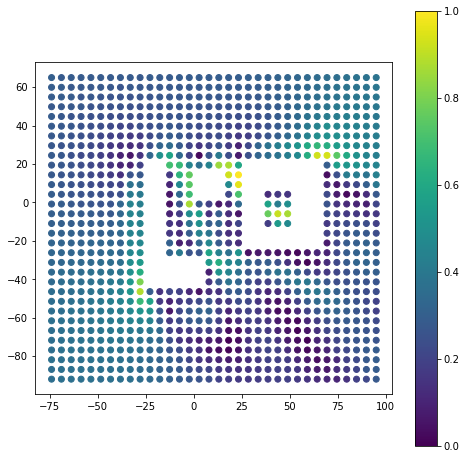

In [12]:
def get_colors(inp, colormap, vmin=None, vmax=None):
    norm = plt.Normalize(vmin, vmax)
    return colormap(norm(inp))


for dir in range(wind_dirs):

    vec_lengths = arr[dir]
    x = X
    y = Y

    colors = get_colors(vec_lengths, plt.cm.viridis)

    plt.scatter(x, y, c=colors)
    plt.axis("scaled")
    plt.colorbar()
    plt.show()


981 9


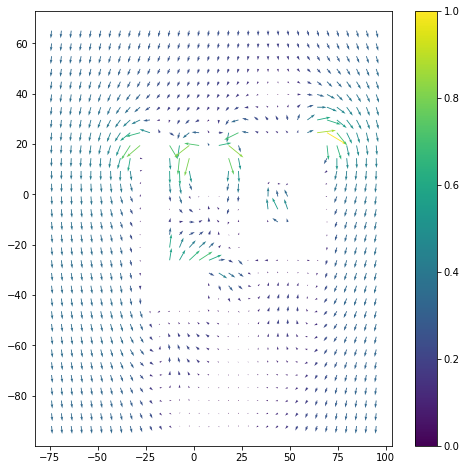

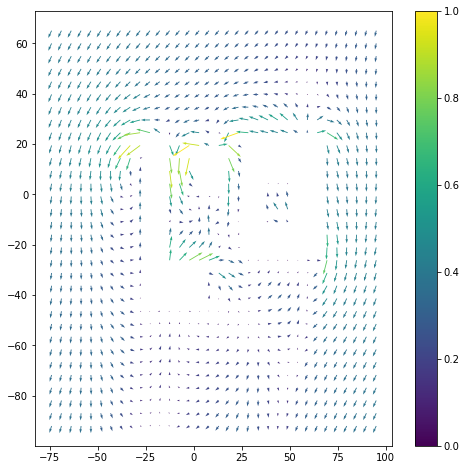

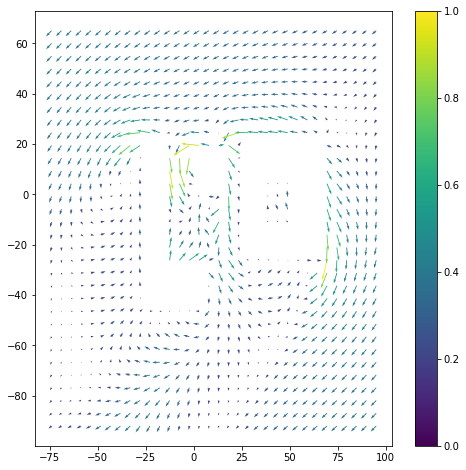

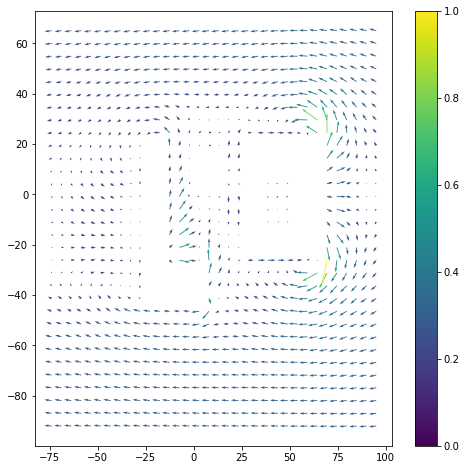

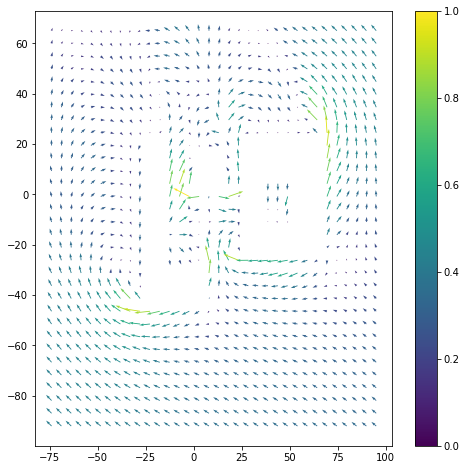

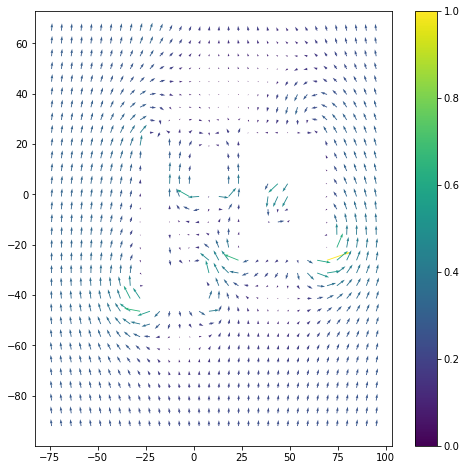

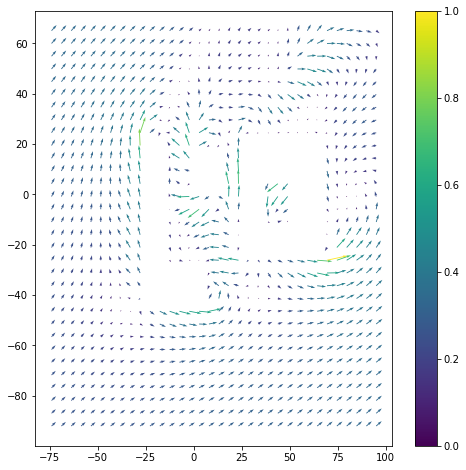

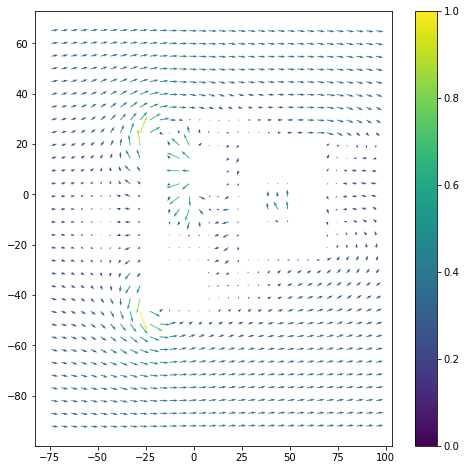

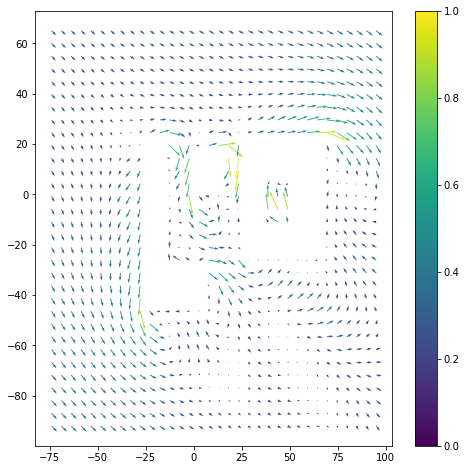

In [13]:
def get_MultiDirectionalVelocities(MDWV_path):

    data = Path(MDWV_path).read_bytes()
    points, wind_dirs = struct.unpack("ii", data[:8])
    print(points, wind_dirs)
    arr = np.zeros((wind_dirs, points), dtype=object)

    skip = 12 + 36
    for p in range(points):
        for dir in range(wind_dirs):
            X = struct.unpack("f", data[skip : skip + 4])[0]
            Y = struct.unpack("f", data[skip + 4 : skip + 4 + 4])[0]
            Z = struct.unpack("f", data[skip + 4 + 4 : skip + 4 + 4 + 4])[0]
            vec = Vector(X, Y, Z)
            arr[dir, p] = vec
            skip += 12
    return arr


arr = get_MultiDirectionalVelocities(MDWV_path)

wind_dir = 0

X = [v[0] for v in arr[wind_dir]]
Y = [v[1] for v in arr[wind_dir]]

assert round(X[0], 4) == 0.0511, "not equal"
assert round(X[1], 4) == 0.0548, "not equal"
assert round(X[2], 4) == 0.0571, "not equal"

wind_dir = 1

X = [v[0] for v in arr[wind_dir]]
Y = [v[1] for v in arr[wind_dir]]

assert round(Y[0], 4) == -0.5382, str(round(Y[0], 4)) + " not equal"
assert round(Y[1], 4) == -0.5332, str(round(Y[1], 4)) + " not equal"
assert round(Y[2], 4) == -0.5481, str(round(Y[2], 4)) + " not equal"


for dir in range(wind_dirs):
    X = [v[0] for v in arr[dir]]
    Y = [v[1] for v in arr[dir]]

    vec_lengths = [v.norm() for v in arr[dir]]

    colors = get_colors(vec_lengths, plt.cm.viridis)

    plt.quiver(x, y, X, Y, color=colors)
    plt.colorbar()
    plt.show()
